

<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Taller 5: Extración de características</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
    
Técnicas de Inteligencia Artificial - Visión de Máquina </p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
  <br>Est. Brian Camilo Valencia Peña (bcvalenciap@unal.edu.co)
  <br>Est. Esteban Ladino Fajardo (eladinof@unal.edu.co)
</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRÓNICA Y ELECTRÓNICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="Escudo_UN.png",width=100,height=100>

<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>06 de mayo de 2022</p>

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy import stats as st

n_imag_monilia=2
imag_monilia=[]

for i in range(n_imag_monilia):
    imag_monilia_aux = cv2.imread(f'../preprocesamiento2_0/imgsSegmentadas/Monilia/Monilia{i+1}.jpg')
    imag_monilia.append(cv2.cvtColor(imag_monilia_aux,cv2.COLOR_BGR2RGB))
    

# plt.figure(figsize=(10, 10))
# for i in range(n_imag_monilia):
#     plt.subplot(3,10,i+1),plt.imshow(imag_monilia[i])
#     plt.xticks([]),plt.yticks([])



Phytophthora import

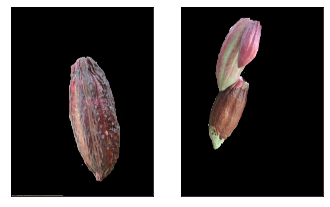

In [16]:
n_imag_fito=2
imag_fito=[]

for i in range(n_imag_fito):
    imag_fito_aux = cv2.imread(f'../preprocesamiento2_0/imgsSegmentadas/Fito/Fito{i+1}.jpg')
    imag_fito.append(cv2.cvtColor(imag_fito_aux,cv2.COLOR_BGR2RGB))
    

# plt.figure(figsize=(30, 30))
# for i in range(n_imag_fito):
  
#     plt.subplot(3,10,i+1),plt.imshow(imag_fito[i])
#     plt.xticks([]),plt.yticks([])



In [5]:
n_imag_healty=2
imag_healty=[]

#favory_healty=[52]
favory_healty=range(n_imag_healty)

for i in favory_healty:
    imag_healty_aux = cv2.imread(f'../preprocesamiento2_0/imgsSegmentadas/Sana/Sana{i+1}.jpg')
    imag_healty.append(cv2.cvtColor(imag_healty_aux,cv2.COLOR_BGR2RGB))
    

# plt.figure(figsize=(10, 10))
# for i in range(n_imag_healty):
#     plt.subplot(3,10,i+1),plt.imshow(imag_healty[i])
#     plt.xticks([]),plt.yticks([])


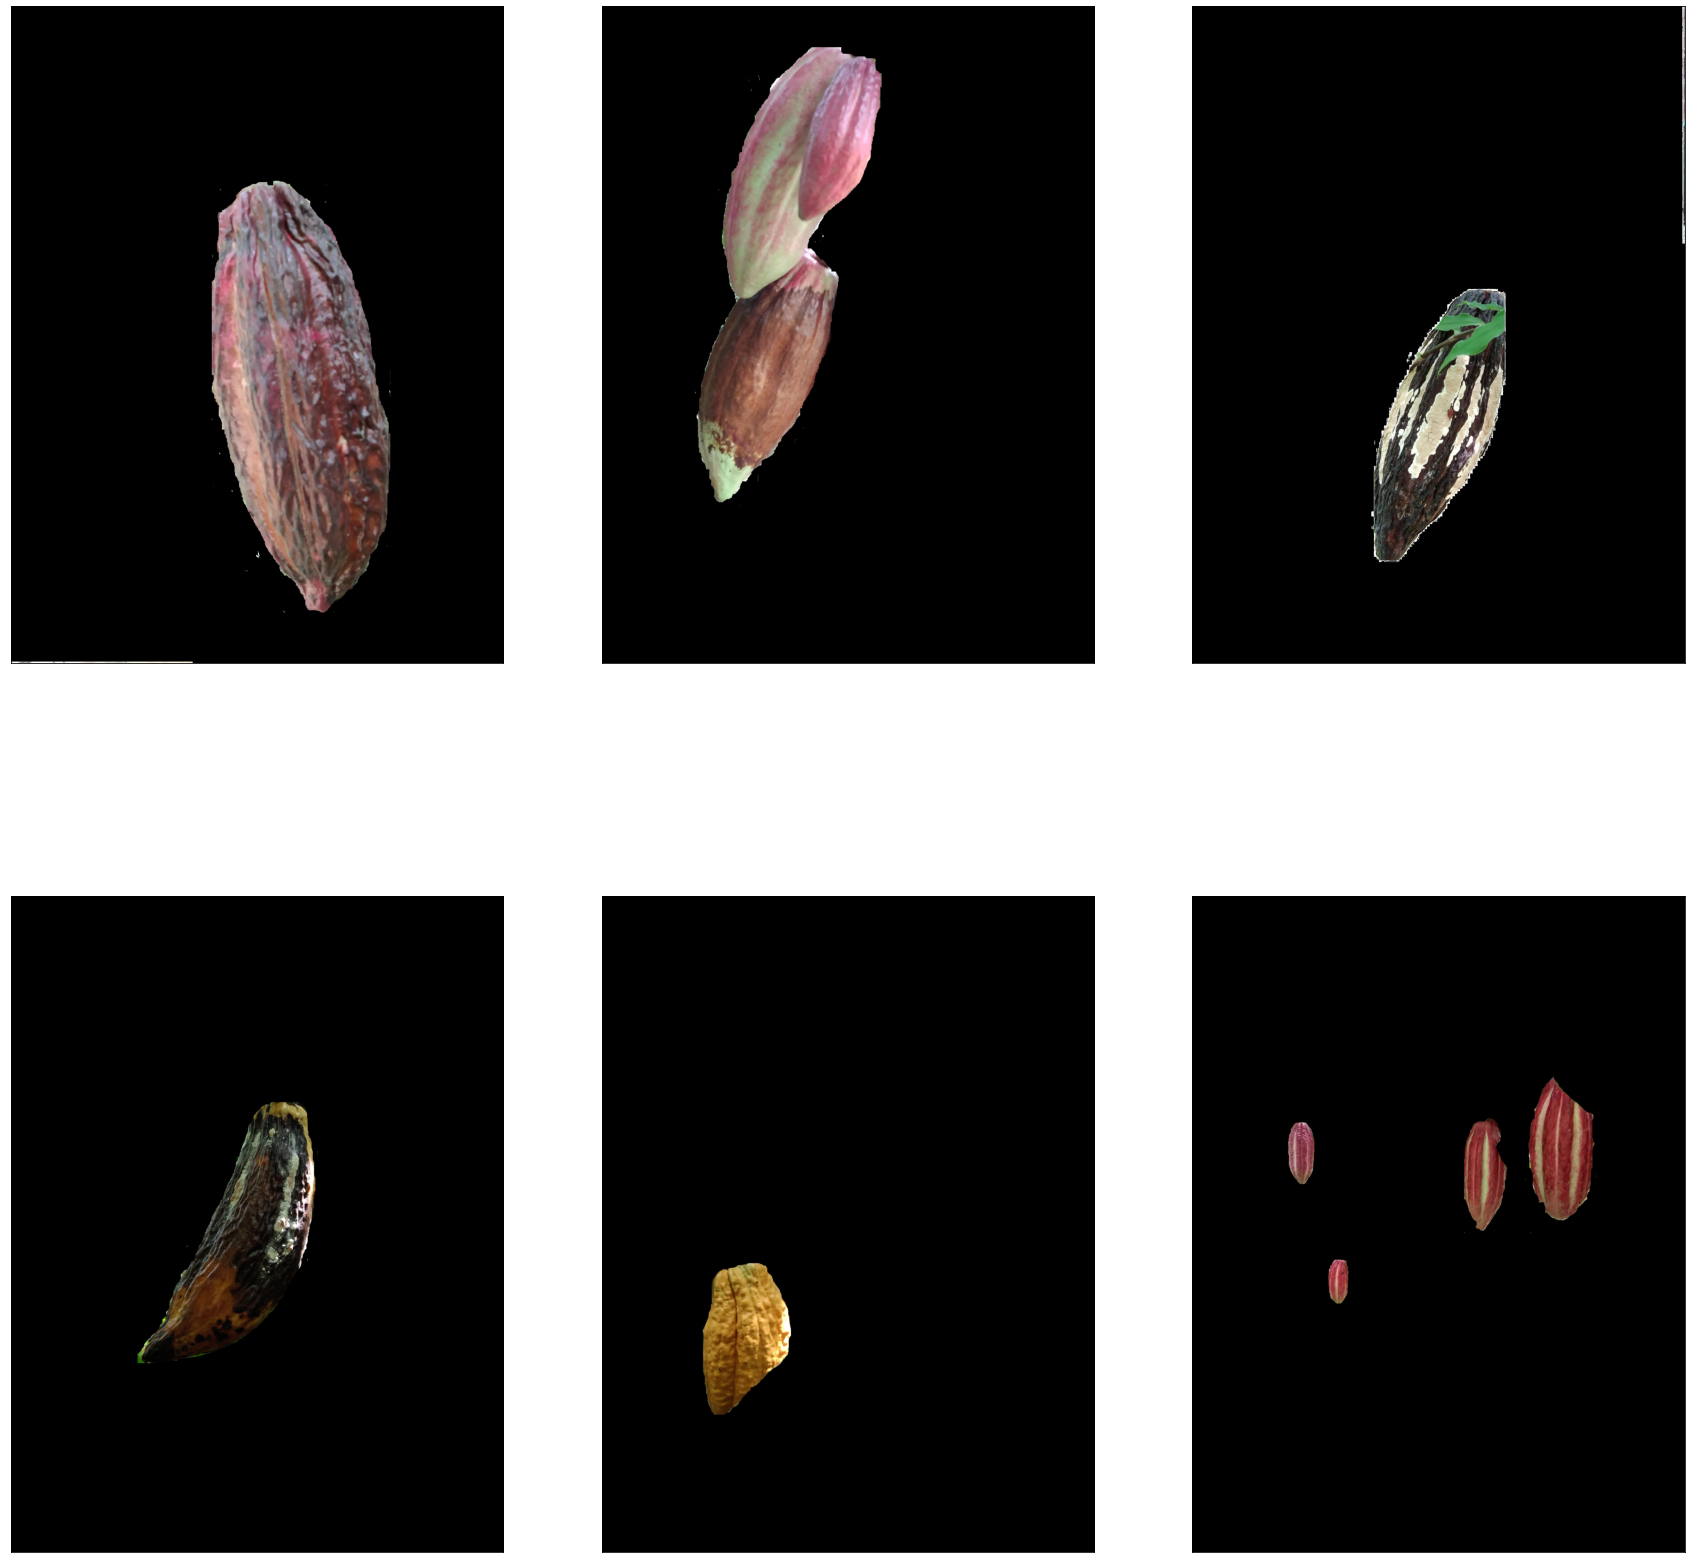

In [18]:
## Se unen todas las imágenes y se haca un redimensionamiento
imagenes = imag_fito+imag_monilia+imag_healty
                                

plt.figure(figsize=(30, 30))
for i in range(len(imagenes)):
    plt.subplot(math.ceil(len(imagenes)/3),3,i+1),plt.imshow(imagenes[i])
    plt.xticks([]),plt.yticks([])

plt.show()


1 CORREGIR INCLINACIÓN DE LOS FRUTOS DE CACAO

<Figure size 2160x2160 with 0 Axes>

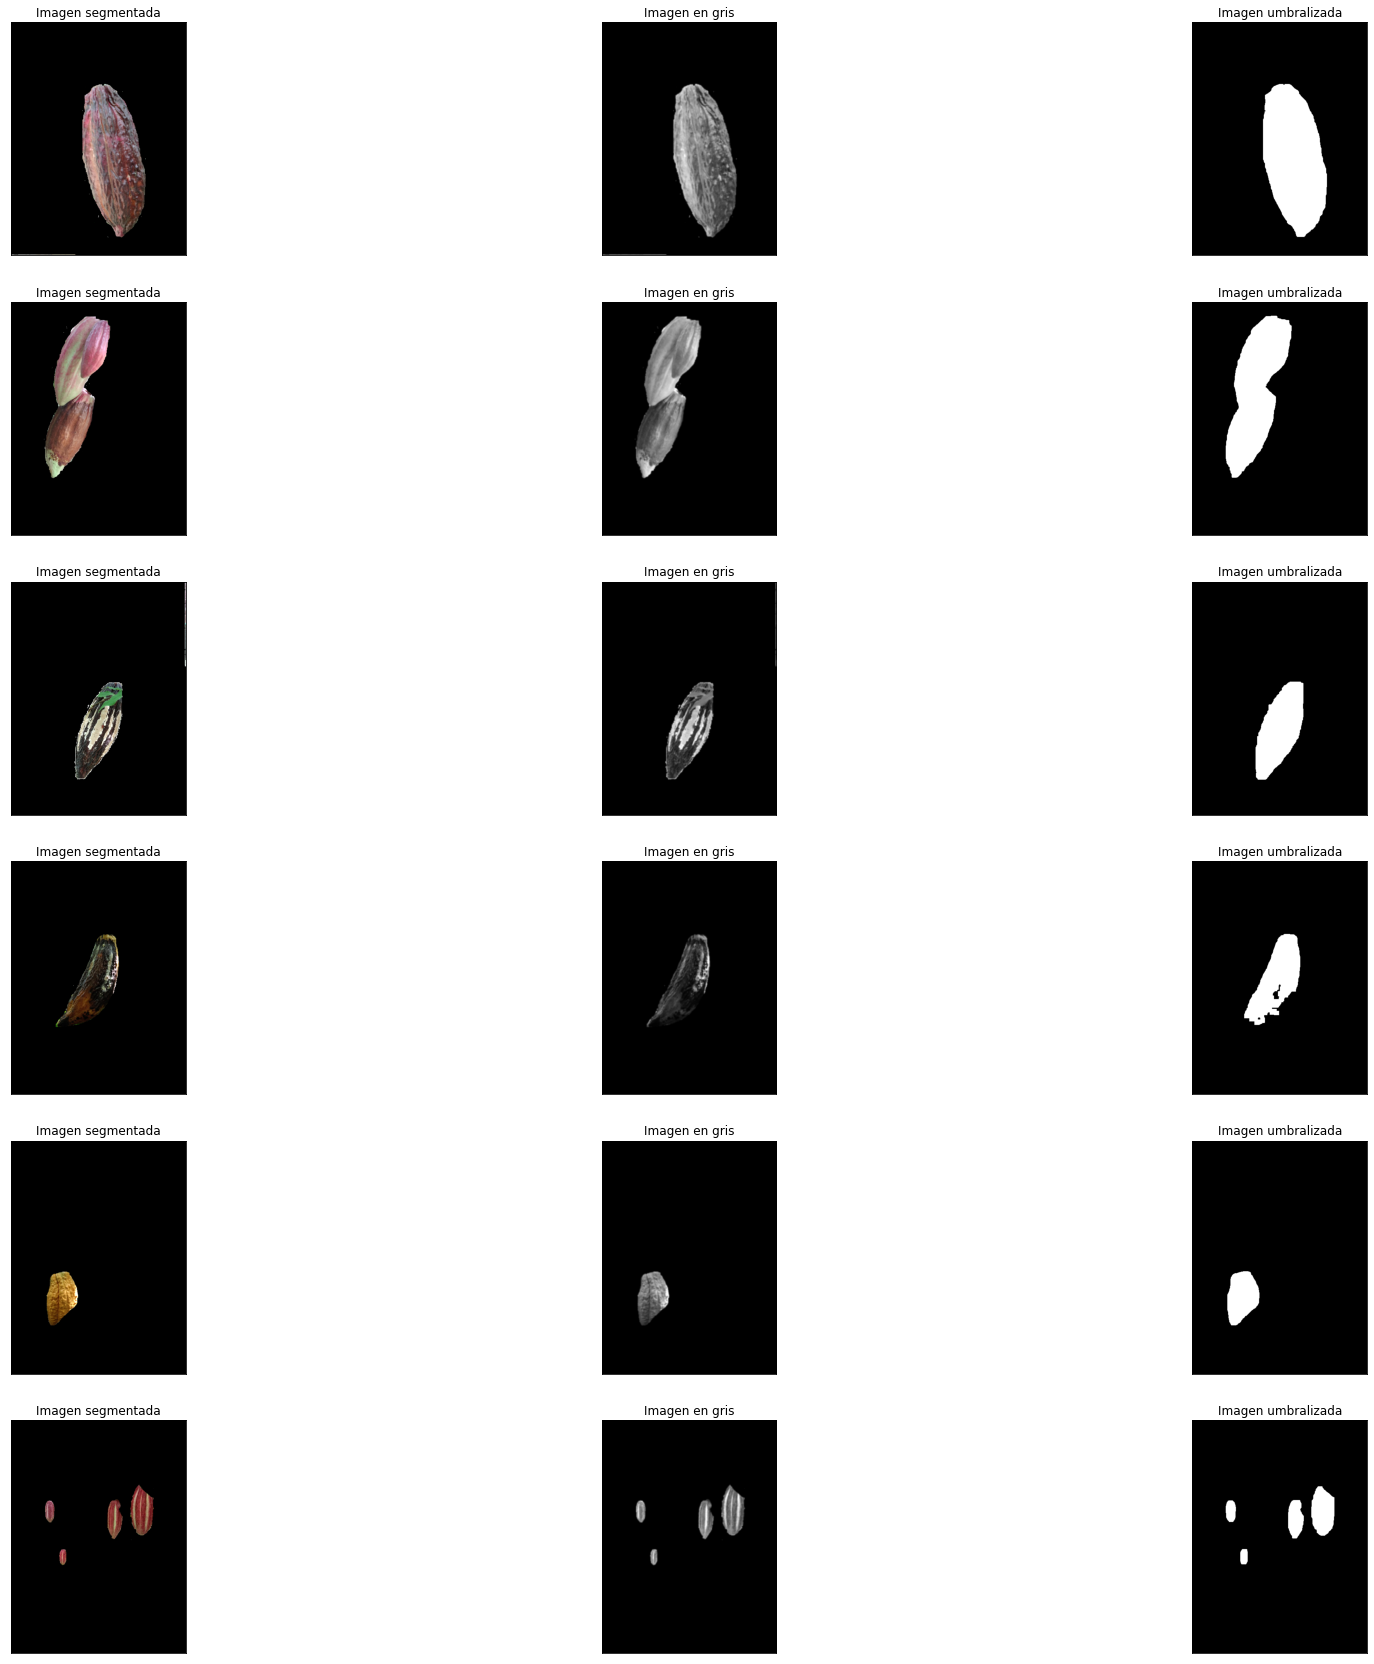

In [25]:
## Preprocesamiento

plt.figure(figsize=(30, 30))

elemento_rectangular = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
kernel=elemento_rectangular


image_blur = []
img_gray_blur = []
contours=[]
img_threshold=[]
img_threshold_morphFilter=[]
img_threshold_morphFilter_erosion=[]
img_threshold_morphFilter_erosion_dilatacion=[]
img_contornos_polylines=[]
img_contornos_drawContours=[]
minSize=512

for i in range(len(imagenes)):
    
    # Reducción de Escala

    n=imagenes[i].shape[0]
    m=imagenes[i].shape[1]
    

    escala= (math.ceil(min(n,m)/minSize))**(-1)
    imagenes[i]= cv2.resize(imagenes[i], None, fx=escala, fy= escala,\
                                interpolation= cv2.INTER_LINEAR)
    
    # Filtro GaussianBlur
    image_blur.append(cv2.GaussianBlur(imagenes[i],(5,5),0))

    # Conversión a escala de grises
    img_gray_blur.append(cv2.cvtColor(image_blur[i], cv2.COLOR_RGB2GRAY)) 

    # Umbralización 'adaptativa' con THRESH_OTSU
    # img_thr_THRESH_OTSU= cv2.threshold(img_gray_blur[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    # Umbralización con threshold
    img_thr_threshold= cv2.threshold(img_gray_blur[i],10,255,0)[1]
    
    img_threshold.append(img_thr_threshold)

    opening = cv2.morphologyEx(img_threshold[i],cv2.MORPH_OPEN,kernel, iterations = 1)
    closing= cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel, iterations = 1)

    img_threshold_morphFilter.append(closing)

        # Erosiones
    n_erosiones=math.ceil((math.log(img_gray_blur[i].shape[0]*img_gray_blur[i].shape[1]))/3)
    img_threshold_morphFilter_erosion.append(\
        cv2.erode(img_threshold_morphFilter[i],kernel,iterations = n_erosiones))

    # Dilataciones
    n_dilataciones=n_erosiones
    img_threshold_morphFilter_erosion_dilatacion.append(cv2.dilate(img_threshold_morphFilter_erosion[i],kernel,\
    iterations = n_dilataciones))


    # Se hallan los contornos [rrr1]
    contours.append(cv2.findContours(\
        img_threshold_morphFilter_erosion_dilatacion[i],cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[0])
    
    cnt = contours[i][0]
    
    img_contornos_polylines.append(imagenes[i].copy())
    img_contornos_drawContours.append(imagenes[i].copy())

    #Dibuja contornos
    cv2.polylines(img_contornos_polylines[i], contours[i], 1, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

    cv2.drawContours(img_contornos_drawContours[i], contours=contours[i],\
        contourIdx=-1, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

plt.figure(figsize=(30, 30))
contador=0
for i in range(0,len(imagenes)*3,3):
    plt.subplot(len(imagenes),3,i+1),plt.imshow(imagenes[contador])
    plt.title('Imagen segmentada'),plt.xticks([]),plt.yticks([])

    plt.subplot(len(imagenes),3,i+2),plt.imshow(img_gray_blur[contador],cmap=plt.cm.gray)
    plt.title('Imagen en gris'),plt.xticks([]),plt.yticks([])

    plt.subplot(len(imagenes),3,i+3),plt.imshow(img_threshold_morphFilter_erosion_dilatacion[contador],cmap=plt.cm.gray)
    plt.title('Imagen umbralizada'),plt.xticks([]),plt.yticks([])

    contador+=1
contador=0
plt.show()


3 Contornos

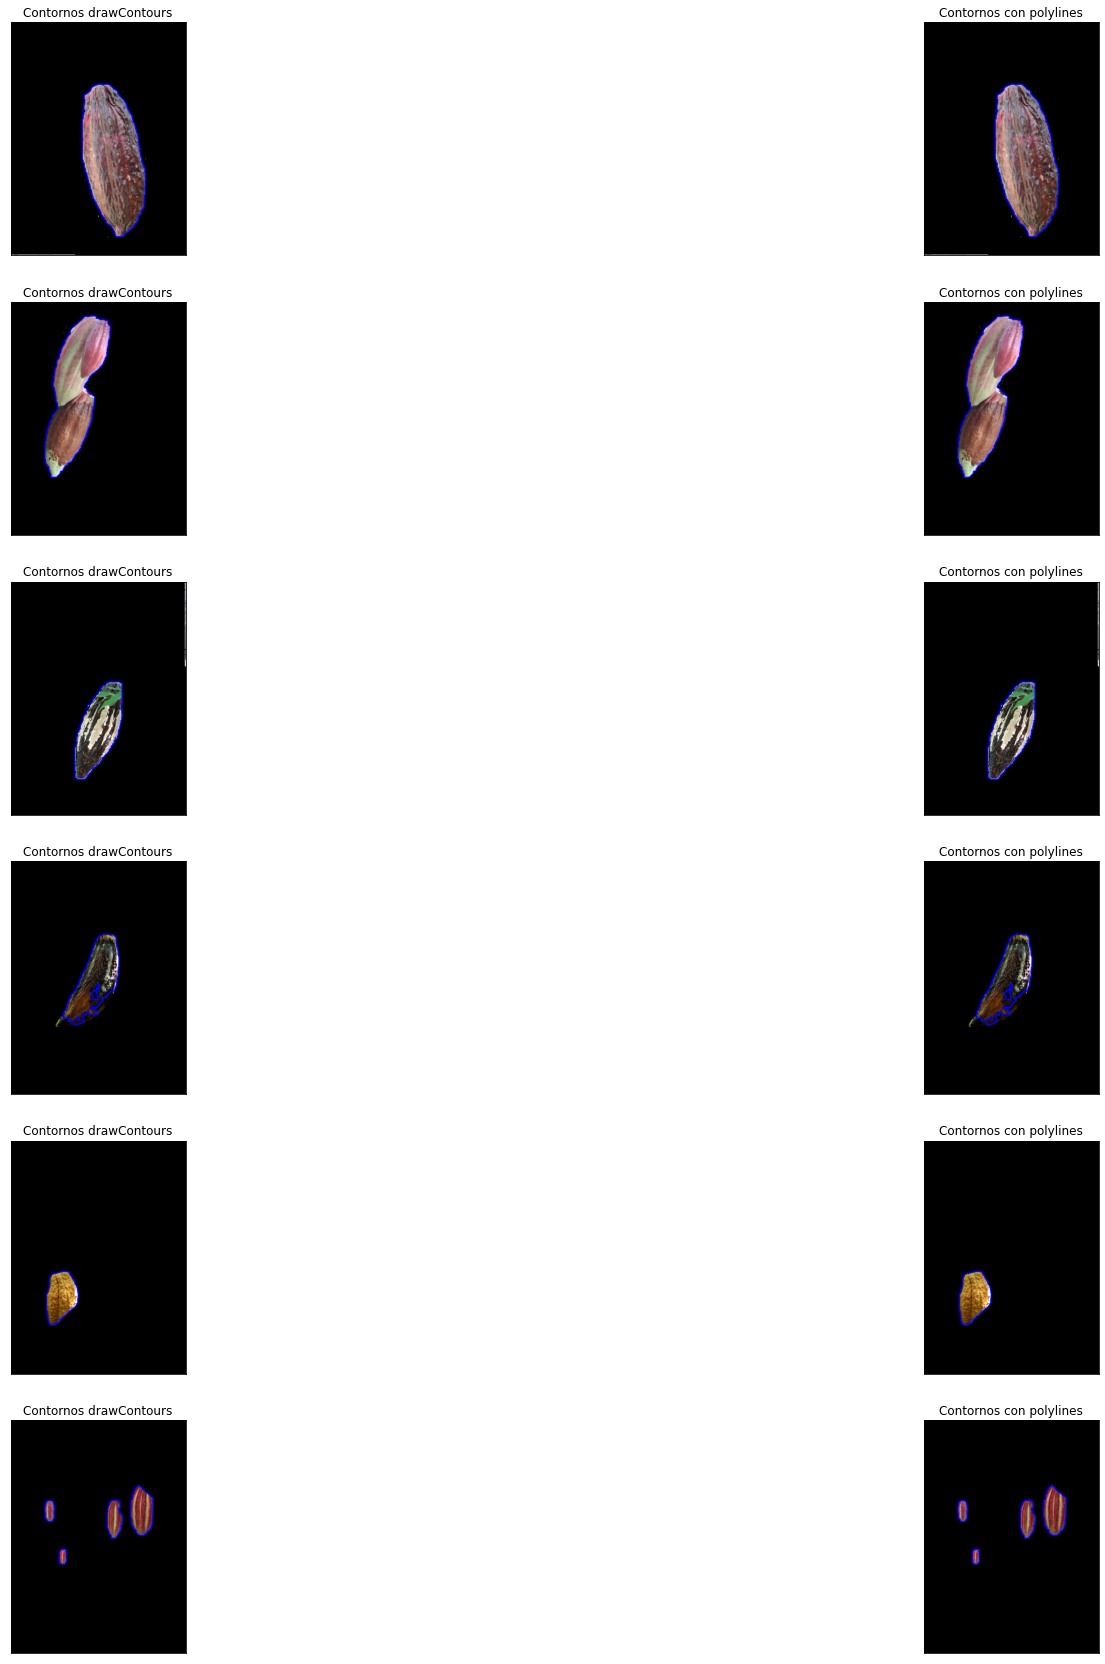

In [31]:
# Se dibujan los contornos
n_total=len(imagenes)

plt.figure(figsize=(30, 30))
for i in range(0,n_total*2,2):
    plt.subplot(n_total,2,i+1),plt.imshow(img_contornos_drawContours[contador])
    plt.title('Contornos drawContours'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(n_total,2,i+2),plt.imshow(img_contornos_polylines[contador])
    plt.title('Contornos con polylines'), plt.xticks([]), plt.yticks([])
    
    contador+=1

contador=0
plt.show()




## Extracción de características

In [45]:
n_imagenes=n_total
n_caracteristicas=1 # Registra el número total de características

caracteristicas=[]

# Nombre de las características deseadas
nombre_caracteristicas=np.array(['Moda R','Moda G','Moda B','Moda Gris','Mediana R','Mediana G','Mediana B','Mediana Gris'\
    ,'Media R','Media G','Media B','Media Gris','Desviacion estandar R','Desviacion estandar G','Desviacion estandar B','Desviacion estandar Gris'\
        ,'min R','min G','min B','min Gris','max R','max G','max B','max Gris'])


for j in range(n_imagenes):

    # Eliminación de partes que no pertenecen al contorno

    n=imagenes[j].shape[0]
    m=imagenes[j].shape[1]
    c=imagenes[j].shape[2]


    # Extracción de RGB
    aux_imagenes=imagenes[j].copy()

    imagenes_R=aux_imagenes[:,:,0]
    imagenes_G=aux_imagenes[:,:,1]
    imagenes_B=aux_imagenes[:,:,2]

    # Se pone en una sola columna la matriz nxm
    imagenes_R.shape=(n*m)
    imagenes_G.shape=(n*m)
    imagenes_B.shape=(n*m)

    img_threshold_morphFilter_erosion_dilatacion[j].shape=(n*m)

    # Se colocan como cero los pixeles que no están en umbralización

    for i in range(n*m):
        if img_threshold_morphFilter_erosion_dilatacion[j][i]==0:
            imagenes_R[i]=0
            imagenes_G[i]=0
            imagenes_B[i]=0

    # Se reajusta el tamaño original
    imagenes_R.shape=(n,m)
    imagenes_G.shape=(n,m)
    imagenes_B.shape=(n,m)
    img_threshold_morphFilter_erosion_dilatacion[j].shape=(n,m)

    # Se arma la nueva imagenesn
    new_imagenes=imagenes[j].copy()
    new_imagenes[:,:,0]=imagenes_R
    new_imagenes[:,:,1]=imagenes_G
    new_imagenes[:,:,2]=imagenes_B

    new_imagenes_gray=cv2.cvtColor(new_imagenes, cv2.COLOR_RGB2GRAY)
   


    
    n=new_imagenes.shape[0]
    m=new_imagenes.shape[1]
    c=new_imagenes.shape[2]


    # Extracción de RGB
    aux_imagenes=new_imagenes.copy()
    aux_new_imagenes_gray=new_imagenes_gray.copy()

    imagenes_R=aux_imagenes[:,:,0]
    imagenes_G=aux_imagenes[:,:,1]
    imagenes_B=aux_imagenes[:,:,2]

    # Se pone en una sola columna la matriz nxm
    imagenes_R.shape=(n*m)
    imagenes_G.shape=(n*m)
    imagenes_B.shape=(n*m)
    aux_new_imagenes_gray.shape=(n*m)

    # print(f'Vector R inicial {imagenes_R.shape}')
    # print(f'Vector G inicial {imagenes_G.shape}')
    # print(f'Vector B inicial {imagenes_B.shape}')
    # print(f'Vector gris inicial {aux_new_imagenes_gray.shape}')

    imagenes_R_sinNegro=[]
    imagenes_G_sinNegro=[]
    imagenes_B_sinNegro=[]
    new_imagenes_gray_sinNegro=[]

    # Se colocan como cero los pixeles que no están en umbralización

    for i in range(n*m):
        if imagenes_R[i]!=0:
            imagenes_R_sinNegro.append(imagenes_R[i])
        if imagenes_G[i]!=0:
            imagenes_G_sinNegro.append(imagenes_G[i])
        if imagenes_B[i]!=0:
            imagenes_B_sinNegro.append(imagenes_B[i])
        
        if aux_new_imagenes_gray[i]!=0:
            new_imagenes_gray_sinNegro.append(aux_new_imagenes_gray[i])
        

    # print(f'Vector R final {len(imagenes_R_sinNegro)}')
    # print(f'Vector G final {len(imagenes_G_sinNegro)}')
    # print(f'Vector B final {len(imagenes_B_sinNegro)}')
    # print(f'Vector gris final {len(new_imagenes_gray_sinNegro)}')


    aux_caracteristicas=[]

    aux_caracteristicas.append(st.mode(imagenes_R_sinNegro)[0][0])
    aux_caracteristicas.append(st.mode(imagenes_G_sinNegro)[0][0])
    aux_caracteristicas.append(st.mode(imagenes_B_sinNegro)[0][0])
    aux_caracteristicas.append(st.mode(new_imagenes_gray_sinNegro)[0][0])


    aux_caracteristicas.append(np.median(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.median(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.median(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.median(new_imagenes_gray_sinNegro))

    aux_caracteristicas.append(np.mean(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.mean(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.mean(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.mean(new_imagenes_gray_sinNegro))


    aux_caracteristicas.append(np.std(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.std(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.std(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.std(new_imagenes_gray_sinNegro))


    aux_caracteristicas.append(np.amin(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.amin(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.amin(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.amin(new_imagenes_gray_sinNegro))


    aux_caracteristicas.append(np.amax(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.amax(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.amax(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.amax(new_imagenes_gray_sinNegro))



    n_caracteristicas=len(aux_caracteristicas)
    caracteristicas+=aux_caracteristicas

caracteristicas=np.array(caracteristicas)
caracteristicas.shape=(n_imagenes,n_caracteristicas)

# print(f'caracteristicas {caracteristicas}')
# #np.array(aux_caracteristicas).shape



## Estandarización

Se debe estandarizar porque los componentes dependen de las escalas y así las variables tienen diferentes rangos. Para pasar a los mismos rangos se suelen pasar los datos a media cero y varianza uno.[rr4]

In [74]:
# Estandarización [rr2]

A = n_imagenes
B = n_caracteristicas



m = np.mean(caracteristicas, axis=0, dtype=np.double)
sigma = np.std(caracteristicas, axis=0, dtype=np.double)
# print(f'media características\n\n{m} \n\nDesviación Estándar características\n{sigma}')

# Eliminación de características con sigma=0 [rr3]
aux_caracteristicas=caracteristicas
aux_nombre_caracteristicas=nombre_caracteristicas

posicionesSigmaCero=[]

# Se halla las posiciones donde sigma es cero
for i in range(len(sigma)):
    if sigma[i]==0:
        posicionesSigmaCero.append(i)

# Se eliminan las caracteristicas con las posiciones de sigma cero

aux_caracteristicas=np.delete(aux_caracteristicas, np.array(posicionesSigmaCero), 1)
aux_nombre_caracteristicas=np.delete(aux_nombre_caracteristicas,np.array(posicionesSigmaCero), -1)

A = aux_caracteristicas.shape[0]
B = aux_caracteristicas.shape[1]


aux_m = np.mean(aux_caracteristicas, axis=0, dtype=np.double)
aux_sigma = np.std(aux_caracteristicas, axis=0, dtype=np.double)
# print(f'media de características sin las que tenían desviación estandar cero\n\n{m}\
#  \nDesviación Estándar características sin las que tenían desviación estandar cero\n\n{sigma}')

# print(f'Características sin desviación estandar cero\n{aux_nombre_caracteristicas}')

print ("\nDatos Modificados")
aux = aux_m/aux_sigma
DatosM = aux_caracteristicas/aux_sigma - aux
m = np.mean(DatosM, axis=0)
print ("\nMedia")
print (m)
sigma = np.std(DatosM, axis=0)
print ("\nDesviación Estándar")
print (sigma)

covM = np.cov(DatosM.transpose())
print ("\nMatriz de Dispersión")

disM = (A-1)*covM
disM=np.absolute(disM)
print (disM)
eigVal2, eigVec2 = np.linalg.eig(disM) 
print ("\nValores propios M_Dis")
print (eigVal2)
print ("\nVectores propios M_Dis") 
print (eigVec2) # Vectores propios organizados por columnas en una matriz


D_S_inicial=np.linalg.det(disM)
print (f'Determinante inicial de S \n {D_S_inicial}')


Datos Modificados

Media
[-7.40148683e-17 -1.11022302e-16 -2.22044605e-16  2.96059473e-16
  2.96059473e-16 -1.85037171e-16 -2.96059473e-16 -1.48029737e-15
  4.81096644e-16 -7.40148683e-16  1.85037171e-16  5.92118946e-16
 -8.14163551e-16  7.40148683e-17  0.00000000e+00  7.40148683e-17
  0.00000000e+00 -2.22044605e-16  2.36847579e-15 -5.92118946e-16
  8.88178420e-16]

Desviación Estándar
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Matriz de Dispersión
[[6.00000000e+00 6.58638696e-01 1.98100547e+00 4.22025842e+00
  6.02606873e-01 3.67129281e+00 3.33823851e+00 5.03084116e+00
  1.11753323e+00 4.27445677e+00 2.96919985e+00 2.88561520e-01
  2.73215323e+00 2.15235403e+00 9.28322087e-01 1.01819916e+00
  6.88363954e-01 1.01719166e+00 1.18133992e+00 1.61062016e+00
  1.51095470e+00]
 [6.58638696e-01 6.00000000e+00 2.39196502e+00 2.90252774e+00
  5.57452409e+00 3.33189466e+00 2.16588248e+00 1.47600601e+00
  4.94898780e+00 2.82669807e+00 1.72878711e+00 4.67258456e+00
  1.35184

In [33]:
# Variabilidad al 95%
def elimacionCaracteristricasMenoresValoresPropios(Datos,nombreDatos,ValoresPropios):
    # Encuentra La posición mínima
    mMenorValor=np.where(np.amin(ValoresPropios) == ValoresPropios)[0][0]

    # Elimina a través del eje Y(1) la columna de los datos y nombres con menor valor propio
    return  np.array([np.delete(Datos, mMenorValor, 1),np.delete(nombreDatos, mMenorValor, 1)])

# Matriz de covarianza (S) y valores propios [10_TIA_Patrones_Generalidades_Pro.ipynb]

# Calcula la matriz de covarianza
S = np.cov(caracteristicas.transpose())  
# print ("\nMatriz de Covarianza")
# print (S)  

#Calcula Los Valores y Vectores propios
# [EVal,EVec] = np.linalg.eig(MC) # attention:not always sorted
EVal= np.linalg.eig(S)[0]
EVal_mag=EVal
print (f'Valores Propios (No ordenados) \n {EVal_mag}')

D_S_inicial=np.linalg.det(S)
print (f'Determinante inicial de S \n {D_S_inicial}')

# print ("\nVectores Propios") # Mostrados en Columnas
# print (EVec)

while False:
    print('Hola')    


Valores Propios (No ordenados) 
 [ 1.02445427e+04+0.00000000e+00j  5.98869604e+03+0.00000000e+00j
  2.69203216e+03+0.00000000e+00j  7.86452224e+02+0.00000000e+00j
  2.27586780e+02+0.00000000e+00j  5.89172658e-13+0.00000000e+00j
 -3.29313871e-13+0.00000000e+00j  2.33111704e-13+5.31795188e-14j
  2.33111704e-13-5.31795188e-14j -2.02798696e-13+0.00000000e+00j
  1.01464205e-13+2.89143825e-14j  1.01464205e-13-2.89143825e-14j
 -1.06888876e-13+0.00000000e+00j  5.58758935e-14+0.00000000e+00j
 -3.79006481e-14+1.76800047e-14j -3.79006481e-14-1.76800047e-14j
 -5.33645028e-14+0.00000000e+00j  1.86304262e-14+1.93576048e-14j
  1.86304262e-14-1.93576048e-14j -1.40974827e-15+4.58656404e-15j
 -1.40974827e-15-4.58656404e-15j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
Determinante inicial de S 
 0.0


In [ ]:
mean = np.empty((0))
eigenvalues = cv2.PCACompute2(caracteristicas.astype(np.double), mean)[2]
print (f'Valores Propios (OpenCV) \n {eigenvalues}')

Valores Propios (OpenCV) 
 [[3.36844604e+04]
 [7.60915539e+03]
 [4.84756741e+03]
 [1.56359384e+03]
 [5.47527089e+01]
 [8.36585767e-13]]


In [62]:
Hola=np.array(['Hola','chao',3,4])

columna_delete=[2,3]

np.delete(Hola, columna_delete, -1)



array(['Hola', 'chao'], dtype='<U21')

In [53]:
np.delete(nombre_caracteristicas, 2, 1)

AxisError: axis 1 is out of bounds for array of dimension 1